#Student Name: SHUBHAM NEGI
#ECE 595 Machine Learning II
#Project 1: CLDNN - Student Code

In [0]:
#Import necessary packages
import keras
import numpy as np
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout, Reshape, LSTM
import matplotlib.pyplot as plt
import cPickle

Using TensorFlow backend.


#Part 0: Importing and normalizing data

In [0]:
#Import dataset and normalize to [0,1]
#Has shape (num_samples, 28, 28)
(data_train, labels_train), (data_test, labels_test) = fashion_mnist.load_data()
data_train = data_train/255.0
data_test = data_test/255.0
data_train = data_train.reshape(60000, 28, 28, 1)
data_test = data_test.reshape(10000, 28, 28, 1)

#Create labels as one-hot vectors
#labels_train and labels_test have shapes (60000, 10) and (10000 10,) respectively, Converting into categorical format
labels_train = keras.utils.np_utils.to_categorical(labels_train, num_classes=10)
labels_test = keras.utils.np_utils.to_categorical(labels_test, num_classes=10)

4431872/4422102 [==============================] - 1s 0us/step


#Part 1: Plotting cross entropy

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0,0.5,'Negative log-likelihood')

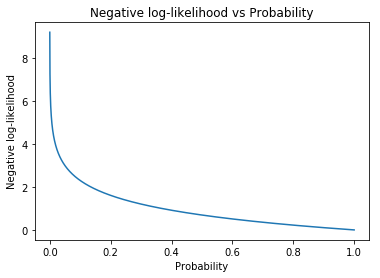

In [0]:
#Show cross-entropy loss function
#FILL THIS CODE BLOCK IN AND PRODUCE PLOT

P=np.linspace(0,1,10000)
NLL=-1*np.log(P)
plt.plot(P,NLL)
plt.title('Negative log-likelihood vs Probability')
plt.xlabel('Probability')
plt.ylabel('Negative log-likelihood')

Answer the following questions:


1.   How is the the negative log-likelihood of p affected when p is small? How about when p is large?

  ANS: For small value of p negative log-likelihood approaches infinity and for p becoming large it approaches zero

2.   Why does the behavior of the negative log-likelihood function make it a good objective function for a minimization problem specifically when the output can be interpreted as a probability space?

  ANS: From the plot of Negative log-likelihood vs Probability it can be infered that for low value of probability (i.e. we are not able to classify the output correctly) the loss function value is very high and for high value of probability (i.e. we are able to classify the output correctly) the loss function value is very low hence this makes it a good objective function for a minimization problem. Also the logarithm is a monotonic transformation hence it prevents the locations of the extremas.

#Part 2: Overfit CNN

In [0]:
#Create and train model architecture
def CNN_overfit():
    #Easiest way to build model in Keras is using Squential. It allows models to 
    #be built layer by layer as we will do here
    model = Sequential()
    
    #FILL THIS IN WITH MODEL ARCHITECTURE
    
    #First Hidden Layer: 2D Conv layer with 256 feature map
    model.add(Conv2D(256,
                    (3,3),
                    activation='relu',
                    input_shape=(28,28, 1)))

    #Second Hidden Layer:2x2 MaxPooling Layer
    model.add(MaxPooling2D(pool_size=(2,2),
                          strides=None,
                          padding='valid',
                          data_format=None))
    
    #Third Hidden Layer: 2D Conv with 128 feature map
    model.add(Conv2D(128,
                     (3,3),
                     activation='relu'))
      
    #Fourth Hidden Layer: 2x2 max pooling layer
    model.add(MaxPooling2D(pool_size=(2,2),
                          strides=None,
                          padding='valid',
                          data_format=None))   
    
    #Fifth Hidden Layer: Layer to flatten the data
    model.add(Flatten())
    
    #Sixth Hidden Layer: A dense layer 
    model.add(Dense(100,
                   activation="relu",
                   kernel_initializer="normal"))
    
    #Seventh Hidden Layer: A dense layer 
    model.add(Dense(100, activation="relu", kernel_initializer="normal"))
    
    #Output Layer
    model.add(Dense(10,
                   activation="softmax"))
    
    return model

#Create instance of CNN model graph
CNN_overfit = CNN_overfit()

#Compile model using an appropriate loss and optimizer algorithm
#FILL THIS IN
CNN_overfit.compile(loss='categorical_crossentropy',
                   optimizer='adam',
                   metrics=['accuracy'])

#Train the model and assign training meta-data to a variable
#FILL THIS IN
CNN_overfit_mdata= CNN_overfit.fit(data_train, labels_train,
                                  validation_data=(data_test, labels_test),
                                  epochs=200,
                                  batch_size=1024,
                                  shuffle=True)

#Print accuracy of model on testing set after training 
#FILL THIS IN
scores=CNN_overfit.evaluate(data_test, labels_test)
print("Accuracy:%.2f%%" %(scores[1]*100))

W0907 16:04:18.956434 140075178059648 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0907 16:04:18.993515 140075178059648 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:4115: The name tf.random_normal is deprecated. Please use tf.random.normal instead.

W0907 16:04:19.033719 140075178059648 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0907 16:04:19.221514 140075178059648 deprecation.py:323] From /usr/local/lib/python2.7/dist-packages/tensorflow/python/ops/math_grad.py:1250: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same br

Train on 60000 samples, validate on 10000 samples
Epoch 1/200
60000/60000 [==============================] - 21s 345us/step - loss: 0.9276 - acc: 0.6694 - val_loss: 0.5638 - val_acc: 0.7866
Epoch 2/200
60000/60000 [==============================] - 11s 187us/step - loss: 0.4793 - acc: 0.8230 - val_loss: 0.4582 - val_acc: 0.8325
Epoch 3/200
60000/60000 [==============================] - 11s 187us/step - loss: 0.3990 - acc: 0.8581 - val_loss: 0.3851 - val_acc: 0.8628
Epoch 4/200
60000/60000 [==============================] - 11s 188us/step - loss: 0.3562 - acc: 0.8721 - val_loss: 0.3777 - val_acc: 0.8627
Epoch 5/200
60000/60000 [==============================] - 11s 189us/step - loss: 0.3258 - acc: 0.8832 - val_loss: 0.3364 - val_acc: 0.8803
Epoch 6/200
60000/60000 [==============================] - 11s 188us/step - loss: 0.3079 - acc: 0.8882 - val_loss: 0.3291 - val_acc: 0.8821
Epoch 7/200
60000/60000 [==============================] - 11s 189us/step - loss: 0.2947 - acc: 0.8924 - val_l

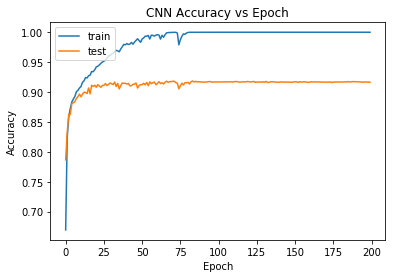

In [0]:
#Plot accuracy vs epoch
#FILL THIS CODE BLOCK IN AND PRODUCE PLOT
plt.plot(CNN_overfit_mdata.history['acc'])
plt.plot (CNN_overfit_mdata.history ['val_acc'])
plt.title('CNN Accuracy vs Epoch')
plt. ylabel ('Accuracy')
plt. xlabel ('Epoch')
plt. legend (['train','test'] , loc= 'upper left')
plt. show()

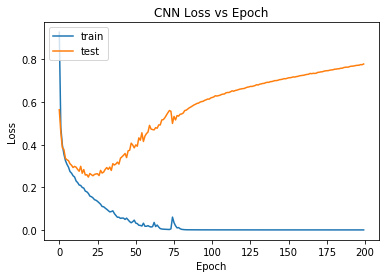

In [0]:
#Plot loss vs epoch
#FILL THIS CODE BLOCK IN AND PRODUCE PLOT
plt.plot(CNN_overfit_mdata.history['loss'])
plt.plot(CNN_overfit_mdata . history ['val_loss'] )
plt.title('CNN Loss vs Epoch')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend( ['train', 'test'] , loc= 'upper left')
plt.show()

Answer the following questions: 



1.   What does the loss of the training set go to? 

  ANS: 4.3668e -06

2.   What does the loss of the testing set go to? 

  ANS: 0.7788
  
3.   What is the reason for the discrepancy between the training and testing set loss? 

  ANS: The plot for the training and testing losses shows that the testing loss is more compared to the training loss. The reason for the discrepancy between two losses is overfitting. Overfitting means that during training our model learns the detail and noise in our data to the extent that it negatively impacts the performance of the model on new data.
4.   Explain why the accuracy of the testing set, after training, differs so much from the testing set regardless of achieving high training accuracy. Name two ways to avoid this. 

  ANS: The accuracy for the training and the testing sets differ so much because of the overfitting in our model. It  reduce the models capacity (capacity means the ability of the model to fit a variety of function). This can be a avoided in two ways:
  
  (i)  Using dropout in our model, by using dropout we will drop some of the synaptic connections.

  (ii) Changing the network structure (number of weights) to change network complexity.

  (iii) Changing the network parameters (value of weights) to change network complexity.
 
 (iv) We can also reduce it by training the netowrk on more examples.

#Part 3: Dropout on input layer

In [0]:
#Create and train model architecture
def CNN_dropout_in():
    model = Sequential()

    #FILL THIS IN WITH MODEL ARCHITECTURE
    
    #30% Dropout in Input Layer
    model.add(Dropout(0.3))
    
    #First Hidden Layer: 2D Conv layer with 256 feature map
    model.add(Conv2D(256,
                    (3,3),
                    activation='relu',
                    input_shape=(28,28, 1)))
    

    #Second Hidden Layer:2x2 MaxPooling Layer
    model.add(MaxPooling2D(pool_size=(2,2),
                          strides=None,
                          padding='valid',
                          data_format=None))
    
    #Third Hidden Layer: 2D Conv with 128 feature map
    model.add(Conv2D(128,
                     (3,3),
                     activation='relu'))
      
    #Fourth Hidden Layer: 2x2 max pooling layer
    model.add(MaxPooling2D(pool_size=(2,2),
                          strides=None,
                          padding='valid',
                          data_format=None))   
    
    #Fifth Hidden Layer: Layer to flatten the data
    model.add(Flatten())
    
    #Sixth Hidden Layer: A dense layer 
    model.add(Dense(100,
                   activation="relu",
                   kernel_initializer="normal"))
    
    #Seventh Hidden Layer: A dense layer 
    model.add(Dense(100, activation="relu", kernel_initializer="normal"))
    
    #Output Layer
    model.add(Dense(10,
                   activation="softmax"))
    
    return model

#Create instance of CNN model graph
CNN_dropout_in = CNN_dropout_in()

#Compile model using an appropriate loss and optimizer algorithm
#FILL THIS IN
CNN_dropout_in.compile(loss='categorical_crossentropy',
                   optimizer='adam',
                   metrics=['accuracy'])

#Train the model and assign training meta-data to a variable
#FILL THIS IN
CNN_dropout_in_mdata= CNN_dropout_in.fit(data_train, labels_train,
                                  validation_data=(data_test, labels_test),
                                  epochs=200,
                                  batch_size=1024,
                                  shuffle=True)

#Print accuracy of model on testing set after training 
#FILL THIS IN
scores=CNN_dropout_in.evaluate(data_test, labels_test)
print("Accuracy:%.2f%%" %(scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/200
60000/60000 [==============================] - 12s 200us/step - loss: 0.9702 - acc: 0.6426 - val_loss: 0.6898 - val_acc: 0.7505
Epoch 2/200
60000/60000 [==============================] - 11s 188us/step - loss: 0.5643 - acc: 0.7861 - val_loss: 0.5869 - val_acc: 0.7850
Epoch 3/200
60000/60000 [==============================] - 11s 187us/step - loss: 0.4833 - acc: 0.8192 - val_loss: 0.5404 - val_acc: 0.8049
Epoch 4/200
60000/60000 [==============================] - 11s 188us/step - loss: 0.4404 - acc: 0.8357 - val_loss: 0.4907 - val_acc: 0.8325
Epoch 5/200
60000/60000 [==============================] - 11s 188us/step - loss: 0.4094 - acc: 0.8498 - val_loss: 0.4608 - val_acc: 0.8376
Epoch 6/200
60000/60000 [==============================] - 11s 189us/step - loss: 0.3871 - acc: 0.8562 - val_loss: 0.4363 - val_acc: 0.8448
Epoch 7/200
60000/60000 [==============================] - 11s 189us/step - loss: 0.3703 - acc: 0.8620 - val_l

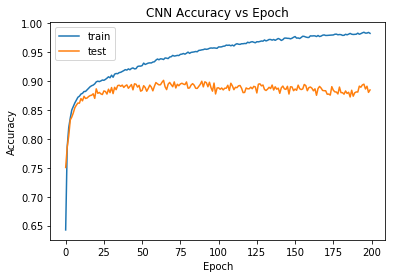

In [0]:
#Plot accuracy vs epoch
#FILL THIS CODE BLOCK IN AND PRODUCE PLOT
plt.plot(CNN_dropout_in_mdata.history['acc'])
plt.plot (CNN_dropout_in_mdata . history ['val_acc'] )
plt.title('CNN Accuracy vs Epoch')
plt.ylabel ('Accuracy')
plt.xlabel ('Epoch')
plt.legend (['train','test'] , loc= 'upper left')
plt.show()

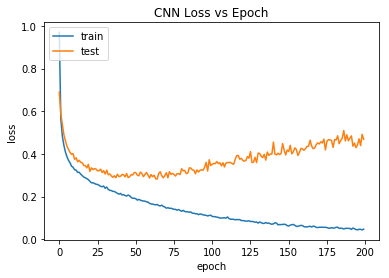

In [0]:
#Plot loss vs epoch
#FILL THIS CODE BLOCK IN AND PRODUCE PLOT
plt.plot(CNN_dropout_in_mdata.history['loss'])
plt.plot(CNN_dropout_in_mdata . history ['val_loss'] )
plt.title('CNN Loss vs Epoch')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend( ['train', 'test'] , loc= 'upper left')
plt.show()

Answer the following questions: 



1.   What does the loss of the training set go to? 

  ANS: 0.0477
  
2.   What does the loss of the testing set go to? 

  ANS: 0.4683

3.   Why is the loss of the training set so different from the loss of the testing set regardless of using dropout? 

  ANS: Here we have added the dropout to the input layer hence we are not allowing our model to learn the complete input. This dropout will be randomly removing some part of the input. Hence dropout here will not help to make the losses for the training and testing set become same. Still the effect of overfitting is not affected by adding dropout here.

#Part 4: Dropout on Hidden Layers

In [0]:
#Create and train model architecture
def CNN_dropout_hidden():
    model = Sequential()

    #FILL THIS IN WITH MODEL ARCHITECTURE
    
    #First Hidden Layer: 2D Conv layer with 256 feature map
    model.add(Conv2D(256,
                    (3,3),
                    activation='relu',
                    input_shape=(28,28, 1)))
    
    # 30% Dropout
    model.add(Dropout(0.3))

    #Second Hidden Layer:2x2 MaxPooling Layer
    model.add(MaxPooling2D(pool_size=(2,2),
                          strides=None,
                          padding='valid',
                          data_format=None))
    
    #Third Hidden Layer: 2D Conv with 128 feature map
    model.add(Conv2D(128,
                     (3,3),
                     activation='relu'))
    
    
    # 30% Dropout
    model.add(Dropout(0.3))
    
    #Fourth Hidden Layer: 2x2 max pooling layer
    model.add(MaxPooling2D(pool_size=(2,2),
                          strides=None,
                          padding='valid',
                          data_format=None))   
    
    #Fifth Hidden Layer: Layer to flatten the data
    model.add(Flatten())
    
    #Sixth Hidden Layer: A dense layer 
    model.add(Dense(100,
                   activation="relu",
                   kernel_initializer="normal"))
    
    #Seventh Hidden Layer: A dense layer 
    model.add(Dense(100, 
                    activation="relu", 
                    kernel_initializer="normal"))
    
    #Output Layer
    model.add(Dense(10,
                   activation="softmax"))
    
    return model

#Create instance of CNN model graph
CNN_dropout_hidden = CNN_dropout_hidden()

#Compile model using an appropriate loss and optimizer algorithm
#FILL THIS IN
CNN_dropout_hidden.compile(loss='categorical_crossentropy',
                   optimizer='adam',
                   metrics=['accuracy'])

#Train the model and assign training meta-data to a variable
#FILL THIS IN
CNN_dropout_hidden_mdata= CNN_dropout_hidden.fit(data_train, labels_train,
                                  validation_data=(data_test, labels_test),
                                  epochs=200,
                                  batch_size=1024,
                                  shuffle=True)

#Print accuracy of model on testing set after training 
#FILL THIS IN
scores=CNN_dropout_hidden.evaluate(data_test, labels_test)
print("Accuracy:%.2f%%" %(scores[1]*100))

W0911 15:59:37.595052 139742130595712 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0911 15:59:37.640121 139742130595712 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0911 15:59:37.647413 139742130595712 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0911 15:59:37.682415 139742130595712 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0911 15:59:37.693120 

Train on 60000 samples, validate on 10000 samples
Epoch 1/200
60000/60000 [==============================] - 29s 483us/step - loss: 0.8752 - acc: 0.6845 - val_loss: 0.6687 - val_acc: 0.7820
Epoch 2/200
60000/60000 [==============================] - 19s 325us/step - loss: 0.4781 - acc: 0.8239 - val_loss: 0.5329 - val_acc: 0.8314
Epoch 3/200
60000/60000 [==============================] - 20s 325us/step - loss: 0.4005 - acc: 0.8565 - val_loss: 0.4754 - val_acc: 0.8499
Epoch 4/200
60000/60000 [==============================] - 20s 325us/step - loss: 0.3534 - acc: 0.8742 - val_loss: 0.4550 - val_acc: 0.8610
Epoch 5/200
60000/60000 [==============================] - 20s 325us/step - loss: 0.3358 - acc: 0.8789 - val_loss: 0.4316 - val_acc: 0.8566
Epoch 6/200
60000/60000 [==============================] - 20s 325us/step - loss: 0.3134 - acc: 0.8866 - val_loss: 0.3935 - val_acc: 0.8739
Epoch 7/200
60000/60000 [==============================] - 19s 325us/step - loss: 0.2953 - acc: 0.8936 - val_l

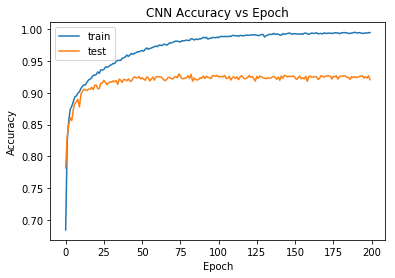

In [0]:
#Plot accuracy vs epoch
#FILL THIS CODE BLOCK IN AND PRODUCE PLOT
plt.plot(CNN_dropout_hidden_mdata.history['acc'])
plt.plot (CNN_dropout_hidden_mdata . history ['val_acc'] )
plt.title('CNN Accuracy vs Epoch')
plt.ylabel ('Accuracy')
plt.xlabel ('Epoch')
plt.legend (['train','test'] , loc= 'upper left')
plt.show()

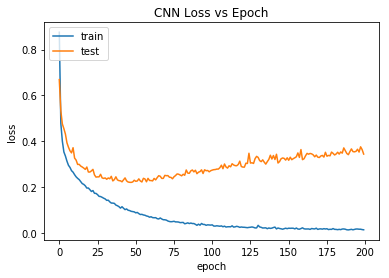

In [0]:
#Plot loss vs epoch
#FILL THIS CODE BLOCK IN AND PRODUCE PLOT
plt.plot(CNN_dropout_hidden_mdata.history['loss'])
plt.plot(CNN_dropout_hidden_mdata . history ['val_loss'] )
plt.title('CNN Loss vs Epoch')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend( ['train', 'test'] , loc= 'upper left')
plt.show()

Answer the following questions:



1.   What does the loss of the training set go to? 

  ANS: 0.0143
  
2.   What does the loss of the testing set go to? 

  ANS: 0.3443

3.   Why was using dropout more effective here in comparison to the architecture in Part 3? 

  ANS: Adding dropout to the input layer makes the model unable to learn some part of the input (i.e. we are not learning some features of our input). But adding dropout to the hidden layer does not remove any feature from our input but it removes some functions from the hidden layer. Hence using dropout here is more effective in comparison to Part 3. 
  
4.   What is the difference in accuracy, after training, between the training and testing set? Is the model a good fit for the data? 

  ANS: The difference between the accuracy for training and testing set is 0.0741. This model is a good fit for the data because the difference between the training and testing accuracy for Part 3 is 0.0978 which is higher compared to 0.0741 here. Also the testing accuracy here (92.07%) is higher compared to Part 3 (88.44%). 

#Part 5: Dropout on Input and Hidden Layers

In [0]:
#Create and train model architecture
def CNN_dropout_both():

    #Easiest way to build model in Keras is using Squential. It allows model to be build layer by layer as we will do here
    model = Sequential()

    #FILL THIS IN WITH MODEL ARCHITECTURE
    
    #30% Dropout in Input Layer
    model.add(Dropout(0.3))
    
    #First Hidden Layer: 2D Conv layer with 256 feature map
    model.add(Conv2D(256,
                    (3,3),
                    activation='relu',
                    input_shape=(28,28, 1)))
    
    #30% Dropout
    model.add(Dropout(0.3))
      
    #Second Hidden Layer:2x2 MaxPooling Layer
    model.add(MaxPooling2D(pool_size=(2,2),
                          strides=None,
                          padding='valid',
                          data_format=None))
    
    #Third Hidden Layer: 2D Conv with 128 feature map
    model.add(Conv2D(128,
                     (3,3),
                     activation='reluYue Cao'))
    
    #30% Dropout
    model.add(Dropout(0.3))
      
    #Fourth Hidden Layer: 2x2 max pooling layer
    model.add(MaxPooling2D(pool_size=(2,2),
                          strides=None,
                          padding='valid',
                          data_format=None))   
    
    #Fifth Hidden Layer: Layer to flatten the data
    model.add(Flatten())
    
    #Sixth Hidden Layer: A dense layer 
    model.add(Dense(100,
                   activation="relu",
                   kernel_initializer="normal"))
    
    #Seventh Hidden Layer: A dense layer 
    model.add(Dense(100, activation="relu", kernel_initializer="normal"))
    
    #Output Layer
    model.add(Dense(10,
                   activation="softmax"))
    
    return model

#Create instance of CNN model graph
CNN_dropout_both = CNN_dropout_both()

#Compile model using an appropriate loss and optimizer algorithm
#FILL THIS IN
CNN_dropout_both.compile(loss='categorical_crossentropy',
                   optimizer='adam',
                   metrics=['accuracy'])

#Train the model and assign training meta-data to a variable
#FILL THIS IN
CNN_dropout_both_mdata= CNN_dropout_both.fit(data_train, labels_train,
                                  validation_data=(data_test, labels_test),
                                  epochs=200,
                                  batch_size=1024,
                                  shuffle=True)

#Print accuracy of model on testing set after training 
#FILL THIS IN
scores=CNN_dropout_both.evaluate(data_test, labels_test)
print("Accuracy:%.2f%%" %(scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/200
60000/60000 [==============================] - 20s 337us/step - loss: 0.9227 - acc: 0.6677 - val_loss: 0.8246 - val_acc: 0.7779
Epoch 2/200
60000/60000 [==============================] - 20s 326us/step - loss: 0.5553 - acc: 0.7915 - val_loss: 0.7221 - val_acc: 0.7998
Epoch 3/200
60000/60000 [==============================] - 20s 325us/step - loss: 0.4827 - acc: 0.8204 - val_loss: 0.7058 - val_acc: 0.8281
Epoch 4/200
60000/60000 [==============================] - 20s 326us/step - loss: 0.4456 - acc: 0.8338 - val_loss: 0.6389 - val_acc: 0.8396
Epoch 5/200
60000/60000 [==============================] - 20s 326us/step - loss: 0.4129 - acc: 0.8487 - val_loss: 0.5937 - val_acc: 0.8405
Epoch 6/200
60000/60000 [==============================] - 20s 327us/step - loss: 0.4024 - acc: 0.8511 - val_loss: 0.6133 - val_acc: 0.8399
Epoch 7/200
60000/60000 [==============================] - 20s 326us/step - loss: 0.3873 - acc: 0.8578 - val_l

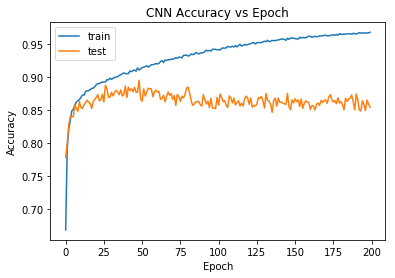

In [0]:
#Plot accuracy vs epoch
#FILL THIS CODE BLOCK IN AND PRODUCE PLOT
plt.plot(CNN_dropout_both_mdata.history['acc'])
plt.plot (CNN_dropout_both_mdata . history ['val_acc'] )
plt.title('CNN Accuracy vs Epoch')
plt.ylabel ('Accuracy')
plt.xlabel ('Epoch')
plt.legend (['train','test'] , loc= 'upper left')
plt.show()

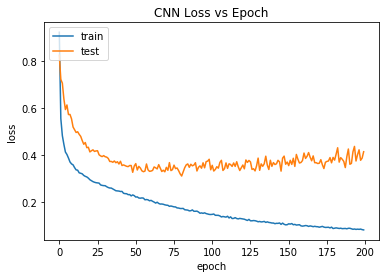

In [0]:
#Plot loss vs epoch
#FILL THIS CODE BLOCK IN AND PRODUCE PLOT
plt.plot(CNN_dropout_both_mdata.history['loss'])
plt.plot(CNN_dropout_both_mdata . history ['val_loss'] )
plt.title('CNN Loss vs Epoch')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend( ['train', 'test'] , loc= 'upper left')
plt.show()

Answer the following questions: 

1.   What does the loss of the training set go to? 

  ANS: 0.0815
  
2.   What does the loss of the testing set go to? 

  ANS: 0.4142
  
3.   What is the difference in accuracy, after training, between the training and testing set?  

  ANS: 0.1142
  
4.   Compare the plots obtained in this part to the plots from Part 4. Did using dropout in the input layer, in addition to using dropout in the hidden layers as in Part 4, significantly increase the robustness of your model? 

  ANS: The difference in accuracy after training, between the training and testing set here is 0.1142 which is more compared to Part 4. Also in this part the testing accuracy is less compared to Part 4. Since here like Part 3 we have added dropout to input layer hence we are not letting our model to learn all the features from our input. Hence using dropout in the input layer did not increase the robustness of our model compared to Part 4.

#Part 6: Creating a CLDNN

Run the code in the block below 'as is.' After executing, the high SNR RadioML training and testing data will be stored in the arrays X_train and X_test, respectively. Their respective one-hot labels will be stored in Y_train and Y_test. 

In [0]:
#Download RML 2016.10b dataset and untar file
!wget http://opendata.deepsig.io/datasets/2016.10/RML2016.10b.tar.bz2
!tar -xvjf RML2016.10b.tar.bz2

#Extract high SNR data and obtain their corresponding lables 
Xd = cPickle.load(open("RML2016.10b.dat",'rb'))
snrs,mods = map(lambda j: sorted(list(set(map(lambda x: x[j], Xd.keys())))), [1,0])
X = []
lbl = []
for mod in mods:
    for snr in snrs:
        if snr > 0:
            X.append(Xd[(mod,snr)])
            for i in range(Xd[(mod,snr)].shape[0]):  lbl.append((mod,snr))
X = np.vstack(X)

np.random.seed(2016)
n_examples = X.shape[0]
n_train = n_examples * 0.8
n_train = int(n_train)
train_idx = np.random.choice(range(0,n_examples), size=n_train, replace=False)
test_idx = list(set(range(0,n_examples))-set(train_idx))
X_train = X[train_idx]
X_test =  X[test_idx]
def to_onehot(yy):
    yy1 = np.zeros([len(yy), max(yy)+1])
    yy1[np.arange(len(yy)),yy] = 1
    return yy1
Y_train = to_onehot(map(lambda x: mods.index(lbl[x][0]), train_idx))
Y_test = to_onehot(map(lambda x: mods.index(lbl[x][0]), test_idx))

#Re-shape data to appropriate dimensions 
X_train = X_train.reshape(432000, 2, 128, 1)
X_test = X_test.reshape(108000, 2, 128, 1)

--2019-09-08 18:11:04--  http://opendata.deepsig.io/datasets/2016.10/RML2016.10b.tar.bz2
Resolving opendata.deepsig.io (opendata.deepsig.io)... 52.14.91.165
Connecting to opendata.deepsig.io (opendata.deepsig.io)|52.14.91.165|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1245608913 (1.2G) [application/x-bzip2]
Saving to: ‘RML2016.10b.tar.bz2’

RML2016.10b.tar.bz2 100%[===================>]   1.16G  6.01MB/s    in 3m 9s   

2019-09-08 18:14:13 (6.29 MB/s) - ‘RML2016.10b.tar.bz2’ saved [1245608913/1245608913]

RML2016.10b.dat
LICENSE.TXT


In [0]:
#Create and train model architecture
def cldnn():
    model = Sequential()
    
    #FILL THIS IN WITH MODEL ARCHITECTURE
    
    #Input Layer and First Hidden Layer
    model.add(Conv2D(256,
                    (1,3),
                    activation='relu',
                    input_shape=(2,128,1)))
    
    #Dropout 20%
    model.add(Dropout(0.2))
    
    #Second Hidden Layer
    model.add(Conv2D(256,
                    (2,3),
                    activation='relu'))  
    
    
    #Third Hidden Layer
    model.add(Conv2D(80,
                    (1,3),
                    activation='relu'))  
   
    #Dropout 20%
    model.add(Dropout(0.2))
    

    #Fourth Hidden Layer
    model.add(Conv2D(80,
                    (1,3),
                    activation='relu'))  
    
    #Reshape 3D -> 2D
    
    model.add( Reshape((120,80)) )
    
    #Fifth Hidden Layer
    
    model.add(LSTM(50))
                   
    #Sixth Hidden Layer
    model.add(Dense(128,
                   activation="relu",
                   kernel_initializer="normal"))
    
    #Output Layer
    model.add(Dense(10,
                   activation="softmax"))
    
    return model

#Create instance of CNN model graph
cldnn=cldnn()

#Compile model using an appropriate loss and optimizer algorithm
#FILL THIS IN
cldnn.compile(loss='categorical_crossentropy',
                   optimizer='adam',
                   metrics=['accuracy'])

#Train the model and assign training meta-data to a variable
#FILL THIS IN
cldnn_mdata= cldnn.fit(X_train, Y_train,
                                  validation_data=(X_test, Y_test),
                                  epochs=100,
                                  batch_size=1024,
                                  shuffle=True)

#Print accuracy of model on testing set after training 
#FILL THIS IN
scores=cldnn.evaluate(X_test, Y_test)
print("Accuracy:%.2f%%" %(scores[1]*100))

W0908 18:20:23.461369 139722470352768 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0908 18:20:23.535523 139722470352768 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0908 18:20:23.562098 139722470352768 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0908 18:20:23.603308 139722470352768 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0908 18:20:23.613540 

Train on 432000 samples, validate on 108000 samples
Epoch 1/100
432000/432000 [==============================] - 292s 675us/step - loss: 2.0522 - acc: 0.1901 - val_loss: 1.5994 - val_acc: 0.3274
Epoch 2/100
432000/432000 [==============================] - 281s 651us/step - loss: 1.2080 - acc: 0.4823 - val_loss: 0.8114 - val_acc: 0.6186
Epoch 3/100
432000/432000 [==============================] - 280s 649us/step - loss: 0.8139 - acc: 0.6350 - val_loss: 0.5704 - val_acc: 0.7158
Epoch 4/100
432000/432000 [==============================] - 280s 648us/step - loss: 0.5405 - acc: 0.7248 - val_loss: 0.5002 - val_acc: 0.7339
Epoch 5/100
432000/432000 [==============================] - 280s 648us/step - loss: 0.4929 - acc: 0.7422 - val_loss: 0.4659 - val_acc: 0.7549
Epoch 6/100
432000/432000 [==============================] - 280s 649us/step - loss: 0.4518 - acc: 0.7607 - val_loss: 0.4165 - val_acc: 0.7810
Epoch 7/100
432000/432000 [==============================] - 280s 647us/step - loss: 0.406

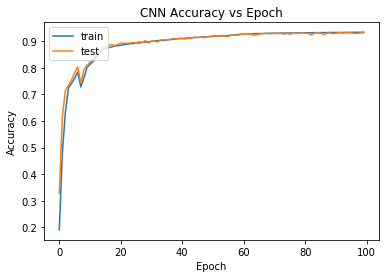

In [0]:
#Plot accuracy vs epoch
#FILL THIS CODE BLOCK IN AND PRODUCE PLOT
plt.plot(cldnn_mdata.history['acc'])
plt.plot (cldnn_mdata . history ['val_acc'] )
plt.title('CNN Accuracy vs Epoch')
plt.ylabel ('Accuracy')
plt.xlabel ('Epoch')
plt.legend (['train','test'] , loc= 'upper left')
plt.show()

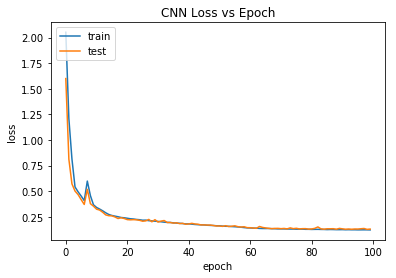

In [0]:
#Plot loss vs epoch
#FILL THIS CODE BLOCK IN AND PRODUCE PLOT
plt.plot(cldnn_mdata.history['loss'])
plt.plot(cldnn_mdata.history ['val_loss'] )
plt.title('CNN Loss vs Epoch')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend( ['train', 'test'] , loc= 'upper left')
plt.show()

Answer the following questions: 



1.   Is this model a good fit for the data?  

  ANS: Yes, this model is a good fit for the data as it can be infered from the plots of accuracy and loss that for both training and testing are nearly same. 

2.   Give two ways to improve the robustness of the model.

  ANS: The two ways to improve the robustness of the model are listed below:

  (i) Dropout: Probabilistically remove some inputs from the neuron.

  (ii) Early Stopping: Moinitor model parameter on a validation set and stop training when performance degrade